### Caso 1. Extactitud de esquemas de diferencias finitas

<p align="justify"> Utilice esquemas de diferencias finitas uniformes de 1er, 2do, y 4to orden de exactitud, para determinar los valores de primera y segunda derivada de la función mostrada en ecuación \ref{campana}</p>

\begin{equation}
    f(x) = \left[1.1cos(\kappa_1x)-1.3sin(\kappa_2x)\right]e^{-\kappa_0x^2}
    \label{campana}
\end{equation}

con $\kappa_0 = \frac{2}{3}$, $\kappa_1 = \frac{5}{3}$, $\kappa_2 = 3\kappa_1$

<p align="justify"> Use como valor de tamaño de malla máximo un valor constante igual a $\Delta x_{max}= \frac{\pi}{6}$, y complemente los esquemas propuestos con diferencias finitas asimétricas para la determinación de las derivadas en las fronteras</p>

In [44]:
import numpy as np
import matplotlib.pyplot as plt

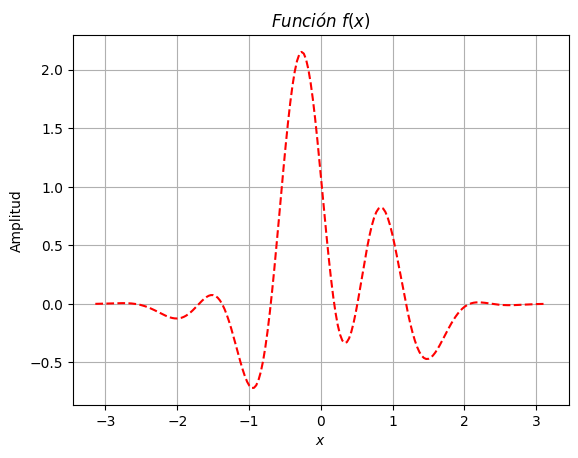

In [112]:
k0 = 2/3; k1 = 5/3; k2 = 3*k1
dx = np.pi/100
Lx = int(np.pi*2/dx) + 1

x = np.linspace(-np.pi, np.pi, Lx)
fun = lambda k0, k1, k2, x :(1.1*np.cos(k1*x) - 1.3*np.sin(k2*x))*np.exp(-k0*x**2)
f = fun(k0, k1, k2, x)

plt.plot(x,f, "--r")
plt.title("$Función~f(x)$")
plt.xlabel("$x$")
plt.ylabel("Amplitud")
plt.grid()


<p align = "justify">La primera (ecuación \ref{firstD}) y segunda (ecuación \ref{secondD}) derivada de la ecuación \ref{campana} son, respectivamente: </p>

\begin{equation}
f^{'}(x) = \dfrac{\mathrm{e}^{-{\kappa}_0x^2}\cdot\left(26{\kappa}_0x\sin\left({\kappa}_2x\right)-13{\kappa}_2\cos\left({\kappa}_2x\right)-11{\kappa}_1\sin\left({\kappa}_1x\right)-22{\kappa}_0x\cos\left({\kappa}_1x\right)\right)}{10}
\label{firstD}
\end{equation}
    
\begin{equation}
f^{''}(x) = -\dfrac{\mathrm{e}^{-{\kappa}_0x^2}\cdot\left(\left(52{\kappa}_0^2x^2-13{\kappa}_2^2-26{\kappa}_0\right)\sin\left({\kappa}_2x\right)-52{\kappa}_0{\kappa}_2x\cos\left({\kappa}_2x\right)-44{\kappa}_0{\kappa}_1x\sin\left({\kappa}_1x\right)+\left(-44{\kappa}_0^2x^2+11{\kappa}_1^2+22{\kappa}_0\right)\cos\left({\kappa}_1x\right)\right)}{10}
\label{secondD}
\end{equation}

In [113]:
Der1F = lambda k0, k1, k2, x : np.exp(-k0*x**2)*(26*k0*x*np.sin(k2*x) - \
                               13*k2*np.cos(k2*x) - 11*k1*np.sin(k1*x) - 22*k0*x*np.cos(k1*x))/10

Der2F = lambda k0, k1, k2, x : -np.exp(-k0*x**2)*((52*k0**2*x**2 - 13*k2**2 - 26*k0)*np.sin(k2*x) - 52*k0*k2*x*np.cos(k2*x) \
                                - 44*k0*k1*x*np.sin(k1*x) + (-44*k0**2*x**2 + 11*k1**2 + 22*k0)*np.cos(k1*x))/10

Text(0.5, 0.98, 'Primera y segunda derivada de $f(x)$')

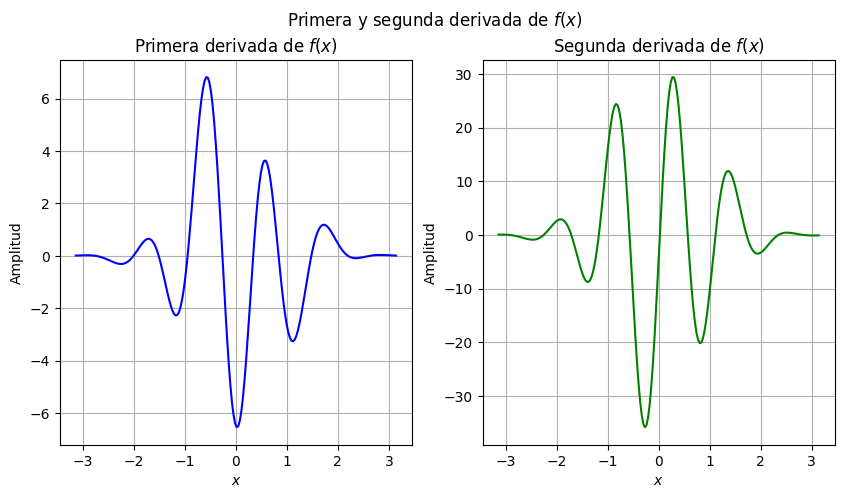

In [114]:
der1f = Der1F(k0, k1, k2, x)
der2f = Der2F(k0, k1, k2, x)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(x, der1f, "-b")
ax[0].set_title('Primera derivada de $f(x)$')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('Amplitud')
ax[0].grid()

ax[1].plot(x, der2f, "-g")
ax[1].set_title('Segunda derivada de $f(x)$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('Amplitud')
ax[1].grid()
 
fig.suptitle('Primera y segunda derivada de $f(x)$')


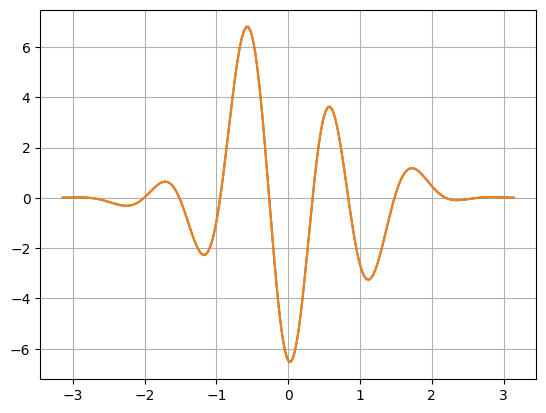

In [130]:
def firstOrder(k0, k1, k2, x):
    derNumer1 = np.ones(len(x)) #Creo el vector que almacenará la derivada numérica
    f = np.ones(len(x))         #Creo el vector que almacenará la función f(x)
    dx = x[1]-x[0]              #Defino el delta de x
    f = fun(k0, k1, k2, x)      #Llamo la función que contiene los valores de f(x)
    
    derNumer1[0] =  (f[1] - f[0])/dx  #FDS para el primer punto
    derNumer1[-1] =  (f[-1] - f[-2])/dx  #BDS para el último punto
    derNumer1[1:-1] =  (f[2:] - f[0:-2])/(2*dx)  #CDS para los valores intermedios
    
    return derNumer1

def secondOrder(k0, k1, k2, x):
    derNumer2 = np.ones(len(x)) #Creo el vector que almacenará la derivada numérica
    f = np.ones(len(x))         #Creo el vector que almacenará la función f(x)
    dx = x[1]-x[0]              #Defino el delta de x
    f = fun(k0, k1, k2, x)      #Llamo la función que contiene los valores de f(x)
    
    derNumer2[:2] =  (-f[2] + 4*f[1] - 3*f[0])/(2*dx)         #FDS para el primer y segundo puntos
    derNumer2[-2:] =  (3*f[-1] - 4*f[-2] + f[-3])/(2*dx)     #BDS para el último y penúltimo puntos
    derNumer2[1:-1] =  (f[2:] - f[0:-2])/(2*dx)
    #derNumer2[2:-2] =  (-f[4:] + 8*f[3:-1] - 8*f[1:-3] + f[0:-4])/(12*dx)
    #CDS para el los valores intermedios
    
    return derNumer2

derNumer1 = firstOrder(k0, k1, k2, x)
derNumer2 = secondOrder(k0, k1, k2, x)


#plt.plot(x,derNumer1)
plt.plot(x,derNumer2)
plt.plot(x, der1f)
plt.grid()


<div class="alert alert-block alert-info"> <p align="justify"> <b>Punto 1.</b> Presentar la metodología de obtención de los siguientes esquemas de diferencias finitas para la primera derivada: </p></div>

<div class="alert alert-block alert-warning"> Obtener y emplear un esquema de segundo orden mediante cualquiera de las técnicas presentadas en clase (o la suya propia!) </div>

Vamos a obtener un esquema hacia adelante de orden dos para la primera derivada. Al despejar $f^{(1)}$ toda la serie de Taylor se divide por $\Delta x$. Así pues, para que el esquema sea de segundo orden, se debe conservar $f^{(1)}$

\begin{align}
 f_{i+1} &= f_{i} + \Delta x f^{(1)} + \dfrac{\Delta x^2}{2!} f^{(2)} +
 \dfrac{\Delta x^3}{3!} f^{(3)} 
\\
 f_{i+2} &= f_{i} + 2 \Delta x f^{(1)} + \dfrac{4\Delta x^2}{2!} f^{(2)} +
 \dfrac{8\Delta x^3}{3!} f^{(3)} \\
\end{align}

Multiplicamos cada ecuación por un peso, $a$ y $b$, y por comidad hacemos que el coeficiente que acompaña la primera derivada sea a:

\begin{equation}
 \frac{af_{i+1}}{\Delta x} = \frac{af_{i}}{\Delta x} + a f^{(1)} + a\frac{\Delta x}{2!} f^{(2)} + a\frac{\Delta x^2}{3!} f^{(3)} 
\label{ST1}
\end{equation}

\begin{equation}
 \frac{bf_{i+2}}{2\Delta x} = \frac{bf_{i}}{2\Delta x} + b f^{(1)} + b \dfrac{2\Delta x}{2!} f^{(2)} + b\dfrac{4\Delta x^2}{3!} f^{(3)}
 \label{ST2}
\end{equation}

De la expansión en series de Taylor se pueden obtener dos ecuaciones: una para la primera derivada, ecuación \ref{primDervida}, y otra para la segunda derivada, ecuación \ref{segDervida}:

\begin{equation}
    af^{(1)} + bf^{(1)} = f^{(1)}
    \\
    a + b = 1
    \label{primDervida}
\end{equation}

\begin{equation}
     a\dfrac{\Delta x}{2!} f^{(2)} + b \dfrac{2\Delta x}{2!} f^{(2)} = 0
     \\
     \dfrac{a}{2} + b  = 0
    \label{segDervida}
\end{equation}

De esta manera se puede plantear un sistema de dos ecuaciones y dos incógnitas:

$$
\left(\begin{array}{cc}
1 & 1  \\
1/2 & 1  
\end{array}\right)  \cdot  
\left(\begin{array}{cc}
a  \\
b  
\end{array}\right) = 
\left(\begin{array}{cc}
1 \\
0  
\end{array}\right)
$$

Al resolverla la matriz aumentanda usando la forma escalonada reducida por renglones, obtenemos que $a=2$ y $b=-1$. Si sumanos la serie de Taylor en \ref{ST1} y en \ref{ST2} reemplanzado los valores de $a$ y $b$:

\begin{equation}
    f^{(1)}_{i} = \frac{1}{\Delta x}\left[ 2f_{i+1} - \frac{f_{i+2}}{2} - 2f_{i} + \frac{f_{i}}{2} \right] + \frac{\Delta x^2}{3}f^{(3)}_{i} + H
\end{equation}

Usando MCM y truncando la serie en la tercera derivada encontramos el esquema FD de segundo orden para la primera derivada:

\begin{equation}
    f^{(1)}_{i} = \frac{1}{\Delta x}\left[\frac{-f_{i+2} + 4f_{i+1} - 3f_{i}}{2} \right] 
    \label{FD2O}
\end{equation}

Para obtener el esquema BD de segundo orden para la primera derivada, se puede emplear el esquema de la ecuación \ref{FD2O}. Únicamente hay "reflejar" el esquema, es decir, multiplicar el numerador por -1 y al igual que a los números dentro de los índices:

\begin{equation}
    f^{(1)}_{i} = \frac{1}{\Delta x}\left[\frac{f_{i-2} - 4f_{i-1} + 3f_{i}}{2} \right] 
    \label{BD2O}
\end{equation}

<div class="alert alert-block alert-warning"> Utilizar el esquema de cuarto orden compacto presentado en Lele (1992). </div>

\begin{equation}
\alpha\left(\frac{\partial \phi}{\partial x}\right)_{i+1}+\left(\frac{\partial \phi}{\partial x}\right)_i+\alpha\left(\frac{\partial \phi}{\partial x}\right)_{i-1}=\beta \frac{\phi_{i+1}-\phi_{i-1}}{2 \Delta x}+\gamma \frac{\phi_{i+2}-\phi_{i-2}}{4 \Delta x} .
\end{equation}

Para Padé-4 se usan las siguientes constantes: $\alpha=\frac{1}{4}$, $\beta = \frac{3}{2}$ y $\gamma = 0$. Se hacen los respectivos reemplazos y adicionalmente se se multiplica la ecuación por 4:

\begin{equation}
\left(\frac{\partial \phi}{\partial x}\right)_{i+1}+4\left(\frac{\partial \phi}{\partial x}\right)_i+\left(\frac{\partial \phi}{\partial x}\right)_{i-1}=3\frac{\phi_{i+1}-\phi_{i-1}}{\Delta x}.
\end{equation}
<br>
<div align='justify'> Los esquemas compactos involucran tanto nodos de la derivada como de las misma función $f$. Para encontar los valores de las derviadas, es necesario despejar la columna de las derivdas nodales, y esto obliga invertir (teóricamente) la matriz de los coeficientes. Antes plantear el sistema, es necesario definir el esquema hacia adelante y hacia atrás que se han de utilizar en los bordes. Para este caso se usará un esquema hacia adelanta (ecuación \ref{derFD4th}) y hacia atrás (ecuación \ref{derBD4th}) de cuarto orden de exactitud no compactos y obtendios de <b>Wolfram CDF player</b>. </div>

\begin{equation}
f^{(1)}_i= \frac{-25f_i + 48f_{i+1} - 36f_{i+2} + 16f_{i+3} - 3f_{i+4}}{12\Delta x}
\label{derFD4th}
\end{equation}

\begin{equation}
f^{(1)}_i= \frac{25f_i - 48f_{i-1} + 36f_{i-2} - 16f_{i-3} + 3f_{i-4}}{12\Delta x}
\label{derBD4th}
\end{equation}

Ahora sí podemos plantear el sistema de ecuaciones:

\begin{equation}
\left(\begin{array}{ccccccc}
1 & 0 & 0 & 0 & 0 & \cdots & 0 \\
1 & 4 & 1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 4 & 1 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & 1 & 4 & 1 \\
0 & 0 & 0 & 0 & \cdots & 0 & 1
\end{array}\right)\left(\begin{array}{c}
f_0^{(1)} \\
f_1^{(1)} \\
f_2^{(1)} \\
\vdots \\
\vdots \\
f_{N-1}^{(1)} \\
f_N^{(1)}
\end{array}\right)=\frac{1}{\Delta x}\left(\begin{array}{c}
\frac{1}{12}(-25f_0 + 48f_{1} - 36f_{2} + 16f_{3} - 3f_{4}) \\
3\left(f_2-f_0\right) \\
3\left(f_3-f_1\right) \\
\vdots \\
\vdots \\
3\left(f_N-f_{N-2}\right) \\
\frac{1}{12}(-25f_N + 48f_{N-1} - 36f_{N-2} + 16f_{N-3} - 3f_{N-4})
\end{array}\right)
\label{}
\end{equation}

<div class="alert alert-block alert-info"> <p align="justify"> <b>Punto 2.</b>Escribir un programa en Python para investigar la exactitud de los esquemas estudiados en función de un tamaño de malla (∆ x), y de la precisión computacional usada.</p></div>

<div class="alert alert-block alert-warning">Sistema de ecuaciones para estimar la primera derivada con un error de orden 1</div>

\begin{equation}
\left(\begin{array}{c}
f^{(1)}_{0} \\
f^{(1)}_{1} \\
f^{(1)}_{2} \\
\vdots \\
f^{(1)}_{N-1} \\
f^{(1)}_{N}
\end{array}
\right)=\frac{1}{\Delta x}\left(\begin{array}{cccccc}
-1 & 1 & 0 & 0 & \cdots & 0 \\
0 & -1 & 1 & 0 & \cdots & 0 \\
0 & 0 & -1 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots\\
0 & \cdots & 0 & -1 & 1 & 0 \\
0 & \cdots & 0 & 0 & -1 & 1
\end{array}\right)\left(\begin{array}{c}
f_0 \\
f_1 \\
f_2 \\
\vdots \\
f_{N-1} \\
f_N
\end{array}\right)
\end{equation}

<div class="alert alert-block alert-warning">Sistema de ecuaciones para estimar la primera derivada con un error de orden 2</div>

<div class="alert alert-block alert-warning">Sistema de ecuaciones para estimar la primera derivada con un error de orden 4</div>


1.4999250037498126
